In [66]:
!pip install tensorflow
!pip install keras
!pip install pandas
!pip install matplotlib
!pip install scikit_learn

     ---------------------------------------- 0.0/57.5 kB ? eta -:--:--
     -------------------- ----------------- 30.7/57.5 kB 660.6 kB/s eta 0:00:01
     ---------------------------------------- 57.5/57.5 kB 1.0 MB/s eta 0:00:00
     ---------------------------------------- 0.0/65.5 kB ? eta -:--:--
     ---------------------------------------- 65.5/65.5 kB 1.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/377.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/377.1 MB ? eta -:--:--
   ---------------------------------------- 0.2/377.1 MB 2.5 MB/s eta 0:02:34
   ---------------------------------------- 0.3/377.1 MB 2.5 MB/s eta 0:02:29
   ---------------------------------------- 0.3/377.1 MB 2.6 MB/s eta 0:02:24
   ---------------------------------------- 0.5/377.1 MB 2.3 MB/s eta 0:02:47
   ---------------------------------------- 0.7/377.1 MB 2.6 MB/s eta 0:02:24
   ---------------------------------------- 0.8/377.1 MB 2.7 MB/s eta 0:02:19
   ---

In [4]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [63]:
##Open Dataset
df = pd.read_csv('CSV Files with Calculated Indicators/NYSE.csv')

In [64]:
#Normalization method 2
sub_df = df[['Date', 'CT']]
df.drop(['Date', 'CT'], axis=1, inplace=True)
normalized_df=(df-df.mean())/df.std()
normalized_df=(df-df.min())/(df.max()-df.min())
concatenated_df = pd.concat([sub_df,normalized_df], axis=1)
print(concatenated_df) 

       Date  CT      Open      High       Low     Close  Adj Close    Volume  \
0     37187   0  0.128013  0.120804  0.131645  0.128013   0.128013  0.110185   
1     37188   0  0.126765  0.119555  0.130394  0.126765   0.126765  0.111844   
2     37189   0  0.131502  0.124294  0.135139  0.131502   0.131502  0.114319   
3     37190   0  0.134417  0.127210  0.138060  0.134417   0.134417  0.103796   
4     37193   1  0.125775  0.118564  0.129402  0.125775   0.125775  0.091650   
...     ...  ..       ...       ...       ...       ...        ...       ...   
5566  45282   0  0.952097  0.953090  0.956590  0.955566   0.955566  0.261967   
5567  45286   0  0.955566  0.958562  0.960691  0.962348   0.962348  0.215203   
5568  45287   0  0.962348  0.959767  0.966360  0.965308   0.965308  0.235786   
5569  45288   0  0.965308  0.961213  0.969106  0.964717   0.964717  0.231434   
5570  45289   0  0.964717  0.959323  0.963956  0.961846   0.961846  0.268926   

       SMAAC_7  SMAAC_12  ...  VARAC_14

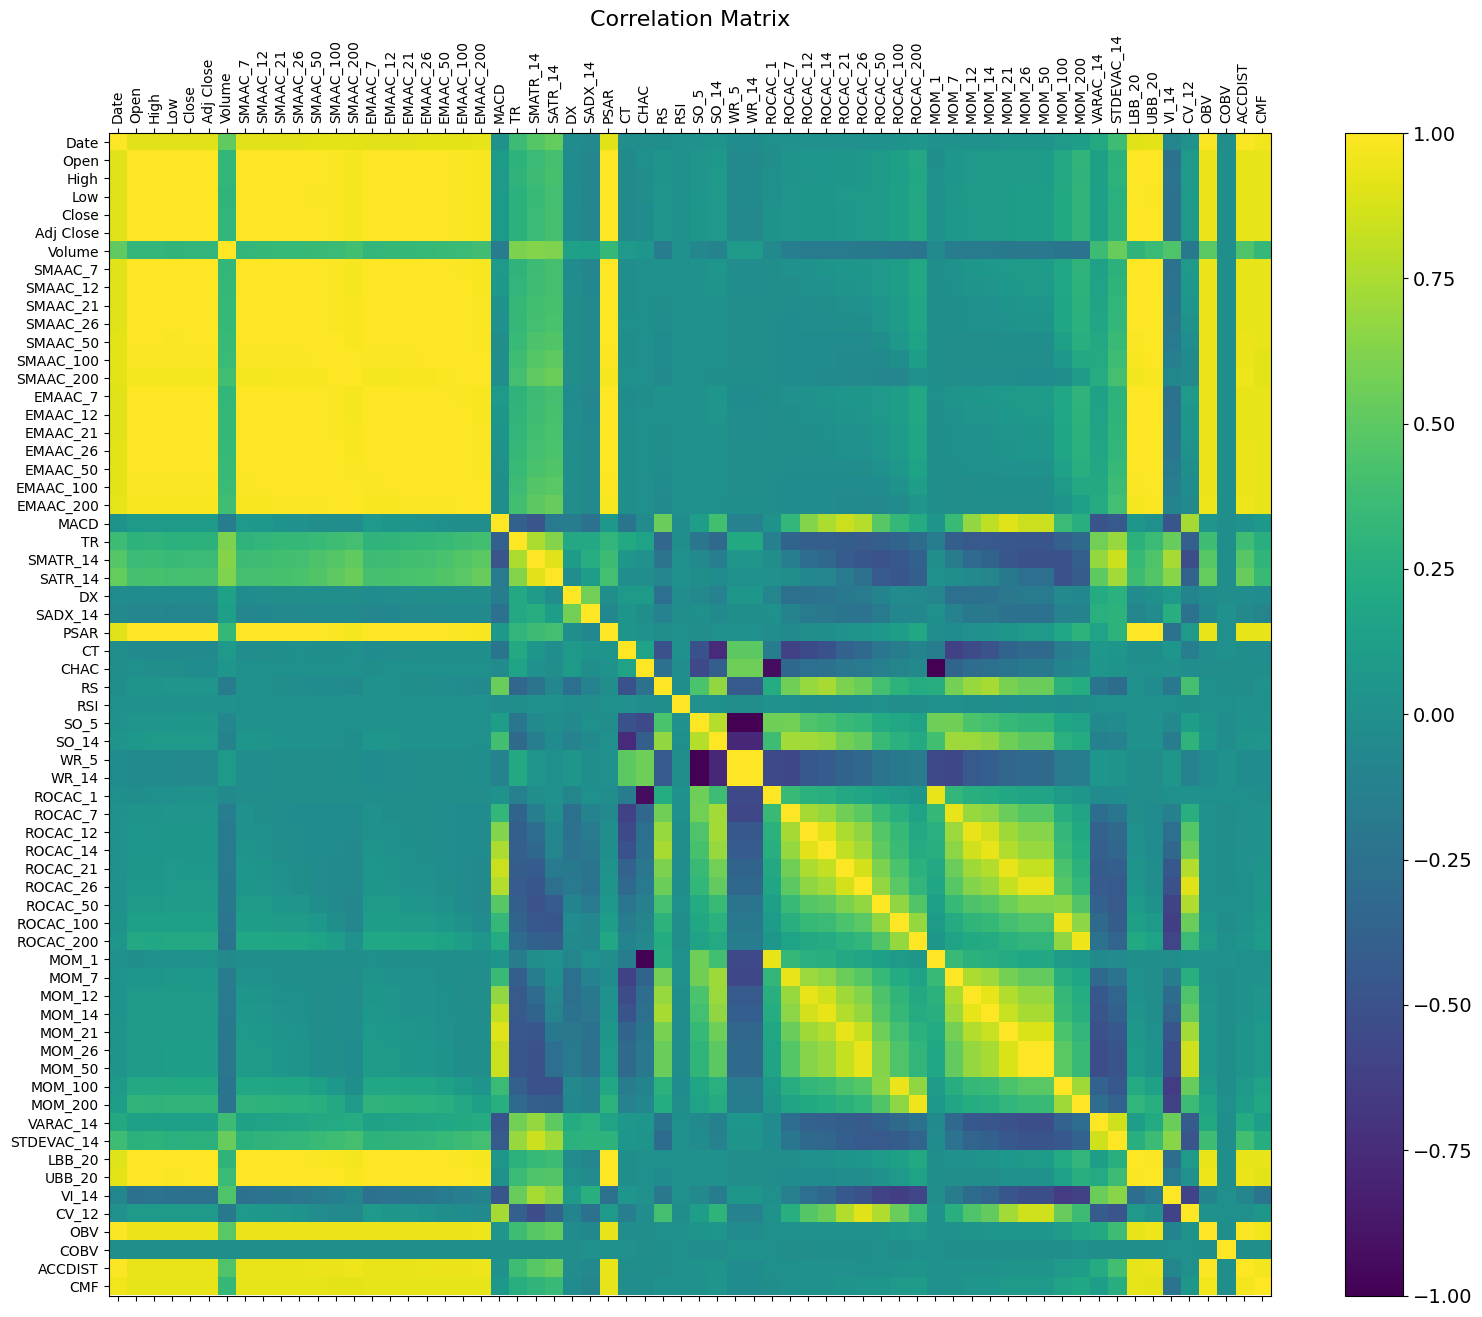

In [6]:
#Plot correlations
f = plt.figure(figsize=(19, 15))
corr = df.corr()
plt.matshow(corr, fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=10, rotation=90)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

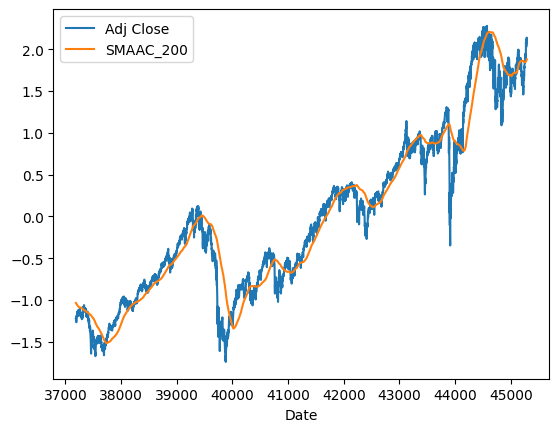

In [45]:
normalized_df.plot(x='Date', y=['Adj Close','SMAAC_200'], kind='line')
plt.show()